In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data2=nc.Dataset('/ihesp/archive/Sunway_Runs/LR_HF_TNST/B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.AICE.185001.210012.nc')

In [3]:
plotvar2 = data2.variables['aice'][8:3000:12,21:30,:53]

In [4]:
aveplot2 = plotvar2.mean(axis=1)

In [5]:
data=nc.Dataset('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.AICE.000101.050012.nc')

In [6]:
plotvar = data.variables['aice'][3008:6000:12,21:30,:53]
lont = data.variables['TLON'][30,:53]
latt = data.variables['TLAT'][30,:53]

In [7]:
250*12

3000

In [8]:
lont

masked_array(data=[320.5625, 321.6875, 322.8125, 323.9375, 325.0625,
                   326.1875, 327.3125, 328.4375, 329.5625, 330.6875,
                   331.8125, 332.9375, 334.0625, 335.1875, 336.3125,
                   337.4375, 338.5625, 339.6875, 340.8125, 341.9375,
                   343.0625, 344.1875, 345.3125, 346.4375, 347.5625,
                   348.6875, 349.8125, 350.9375, 352.0625, 353.1875,
                   354.3125, 355.4375, 356.5625, 357.6875, 358.8125,
                   359.9375,   1.0625,   2.1875,   3.3125,   4.4375,
                     5.5625,   6.6875,   7.8125,   8.9375,  10.0625,
                    11.1875,  12.3125,  13.4375,  14.5625,  15.6875,
                    16.8125,  17.9375,  19.0625],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [9]:
(321.6875-320.5625)*8.9


10.012500000000001

In [10]:
plotvar2.shape

(250, 9, 53)

In [11]:
aveplot = plotvar.mean(axis=1)

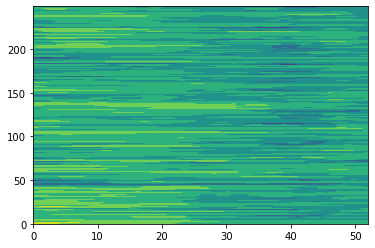

In [12]:
plt.contourf(aveplot)

In [13]:
A = np.arange(250)
#B = lont
B = np.arange(53)
xx, yy = np.meshgrid(B, A)

In [14]:
B

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [15]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'spacing'
  if sys.path[0] == '':
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


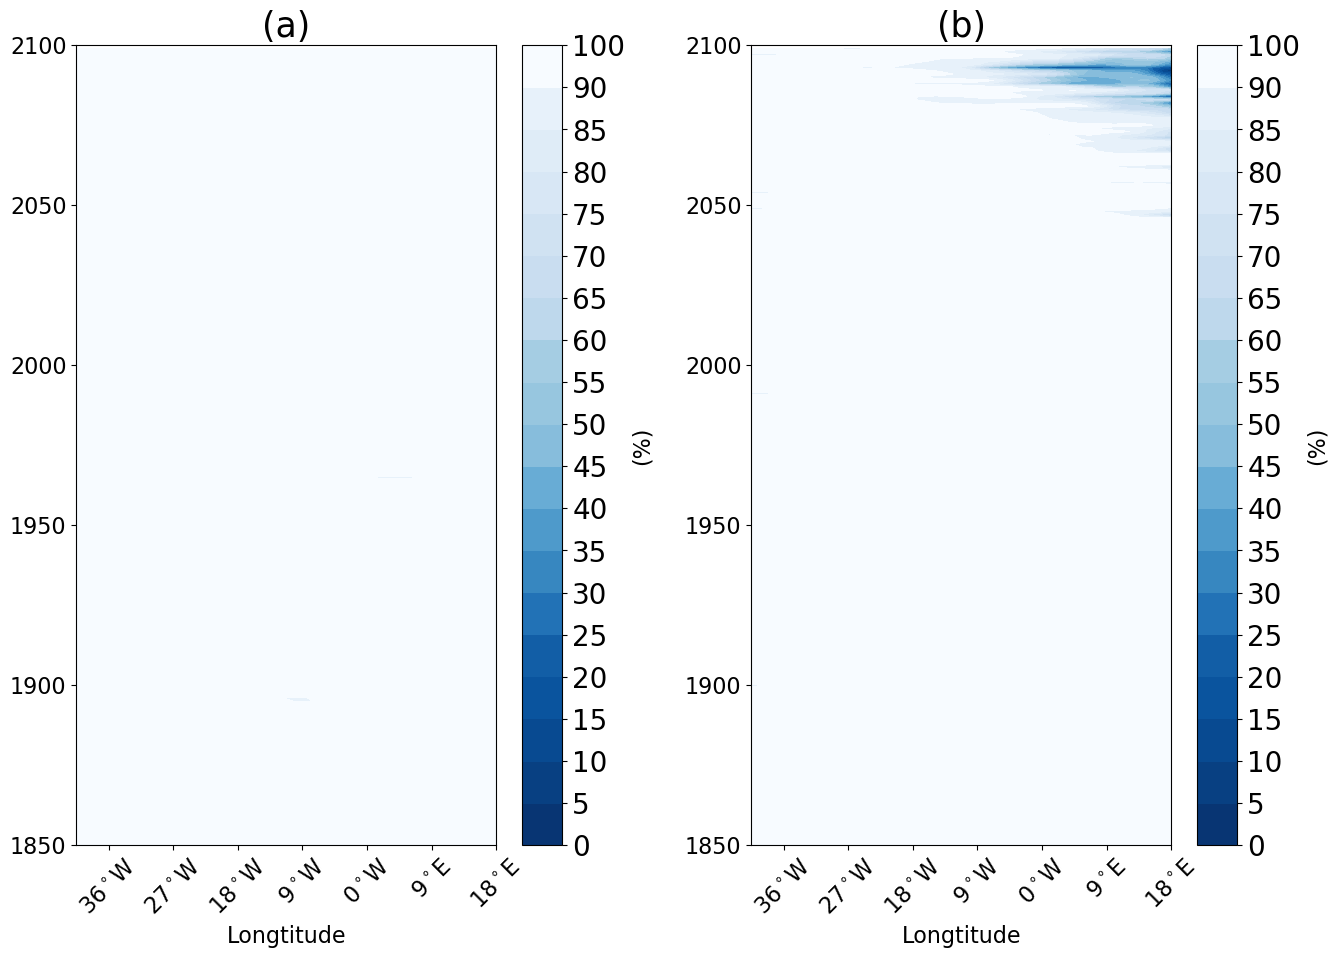

In [16]:
# plot the result
my_font = {'fontname':'Cambria', 'size':'6'}
##################################################################
fig = plt.figure(figsize=(15,10), dpi=100)
################################################################
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.8],
                    xticklabels=[])

#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'16'}
im = ax1.contourf(xx, yy, aveplot[:,:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels)#,extend='max')

im.cmap.set_over('white')



cbar = fig.colorbar(im, ax=ax1,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(%)', **my_font)
plt.xticks(range(4,53,8), ['36$^\circ$W','27$^\circ$W','18$^\circ$W','9$^\circ$W', '0$^\circ$W', '9$^\circ$E', '18$^\circ$E'],**my_font)
#plt.yticks(range(0,86,10), ['1920', '1930','1940', '1950','1960','1970','1980', '1990','2000','2010'],**my_font)
plt.xticks(rotation = 45)
plt.yticks(range(0,251,50), ['1850','1900', '1950','2000', '2050','2100','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
#plt.ylabel('Years',**my_font)
ax1.set_title('(a)',fontsize = 25)

################################################################
ax2 = fig.add_axes([0.55, 0.1, 0.35, 0.8],
                    xticklabels=[])

#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'16'}
im = ax2.contourf(xx, yy, aveplot2[:,:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels)#,extend='max')

im.cmap.set_over('white')



cbar = fig.colorbar(im, ax=ax2,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(%)', **my_font)
plt.xticks(range(4,53,8), ['36$^\circ$W','27$^\circ$W','18$^\circ$W','9$^\circ$W', '0$^\circ$W', '9$^\circ$E', '18$^\circ$E'],**my_font)

plt.xticks(rotation = 45)
plt.yticks(range(0,251,50), ['1850','1900', '1950','2000', '2050','2100','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
#plt.ylabel('Years',**my_font)
ax2.set_title('(b)',fontsize = 25)


plt.savefig("LR-PI.png",bbox_inches='tight',dpi=fig.dpi)



/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'spacing'
  if sys.path[0] == '':
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: The following kwargs were not used by contour: 'spacing'


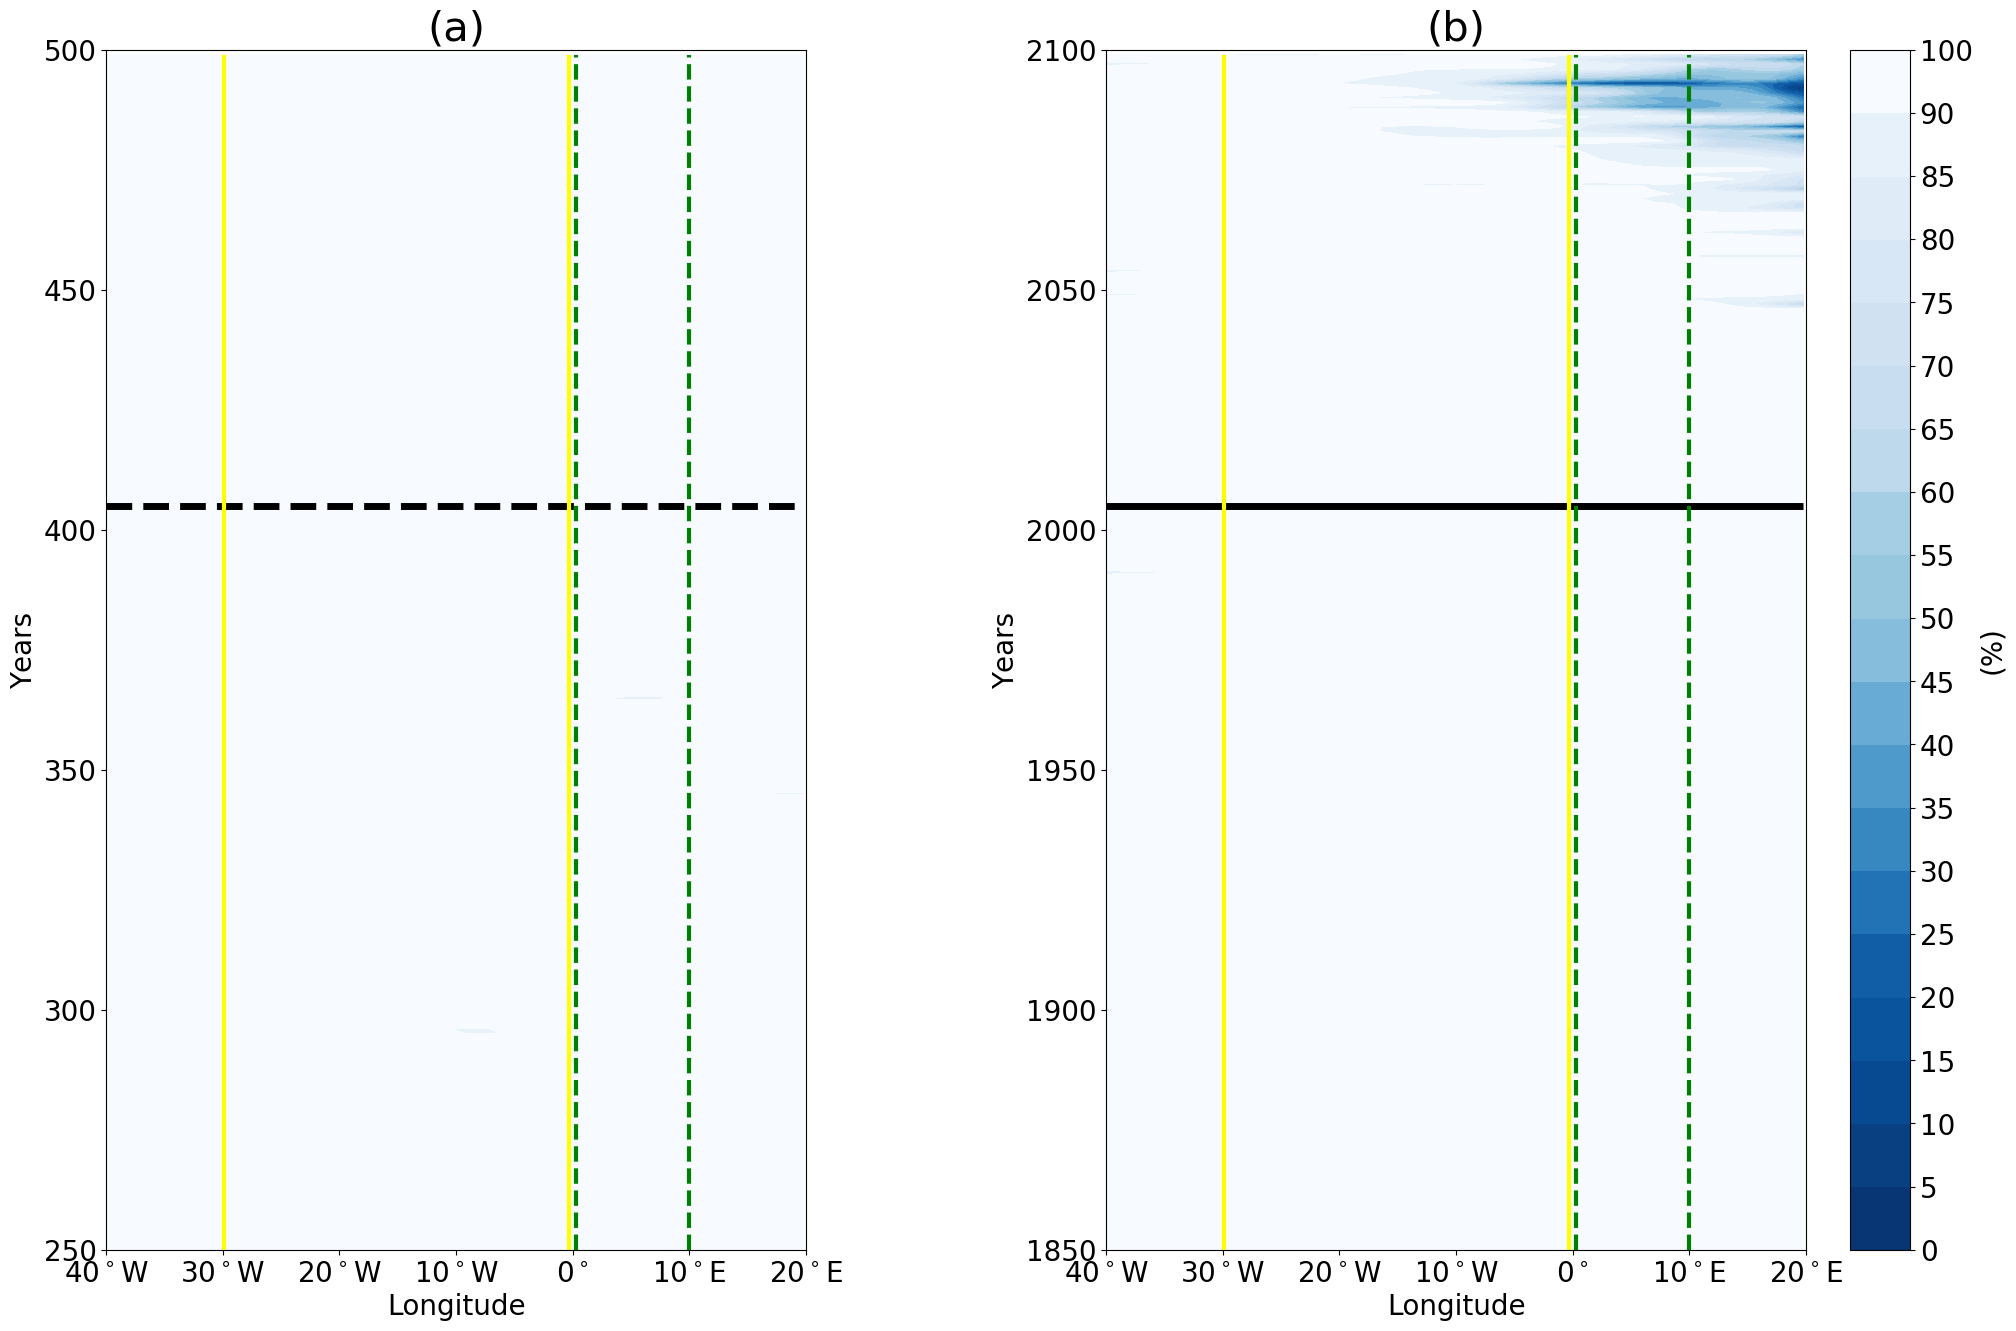

In [20]:
# plot the result
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(25,15), dpi=100)
################################################################
ax1 = fig.add_axes([0.5, 0.1, 0.35, 0.8],
                    xticklabels=[])

#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax1.contourf(xx, yy, aveplot2[:,:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels)#,extend='max')

im.cmap.set_over('white')
#im.cmap.set_under('darkblue')
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax1,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(%)', **my_font)

plt.hlines(155, 0, 52, colors = "black",linestyles = "solid",linewidth=5)
#plt.hlines(124, 0, 599, colors = "red",linestyles = "solid",linewidth=3)
#plt.hlines(125, 0, 599, colors = "red",linestyles = "solid",linewidth=3)
#plt.hlines(126, 0, 599, colors = "red",linestyles = "solid",linewidth=3)

#plt.hlines(166, 0, 599, colors = "red",linestyles = "solid",linewidth=3)
#plt.hlines(167, 0, 599, colors = "red",linestyles = "solid",linewidth=3)

plt.vlines(8.8, 0, 249, colors = "yellow",linestyles = "solid",linewidth=3)
plt.vlines(34.5, 0, 249, colors = "yellow",linestyles = "solid",linewidth=3)


plt.vlines(35, 0, 249, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(43.5, 0, 249, colors = "green",linestyles = "dashed",linewidth=3)
plt.xticks(np.arange(0,53,8.7), ['40$^\circ$W','30$^\circ$W','20$^\circ$W','10$^\circ$W', '0$^\circ$', '10$^\circ$E', '20$^\circ$E'],**my_font)
plt.yticks(range(0,251,50), ['1850', '1900','1950', '2000','2050','2100'],**my_font)
plt.ylabel('Years',**my_font)
#plt.yticks(range(0,351,50), ['150','200', '250','300', '350','400','450','500'],**my_font)
plt.xlabel('Longitude',**my_font)
#plt.ylabel('Years',**my_font)
ax1.set_title('(b)',fontsize = 30)

ax2 = fig.add_axes([0.1, 0.1, 0.35, 0.8],
                    xticklabels=[])

im = ax2.contourf(xx, yy, aveplot[:,:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels)#,extend='max')

im.cmap.set_over('white')

cbar = fig.colorbar(im, ax=ax2,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.remove()
plt.hlines(155, 0, 52, colors = "black",linestyles = "dashed",linewidth=5)
plt.vlines(8.8, 0, 249, colors = "yellow",linestyles = "solid",linewidth=3)
plt.vlines(34.5, 0, 249, colors = "yellow",linestyles = "solid",linewidth=3)


plt.vlines(35, 0, 249, colors = "green",linestyles = "dashed",linewidth=3)
plt.vlines(43.5, 0, 249, colors = "green",linestyles = "dashed",linewidth=3)
plt.xticks(np.arange(0,53,8.7), ['40$^\circ$W','30$^\circ$W','20$^\circ$W','10$^\circ$W', '0$^\circ$', '10$^\circ$E', '20$^\circ$E'],**my_font)
plt.yticks(range(0,251,50), ['250','300', '350','400','450','500'],**my_font)
plt.xlabel('Longitude',**my_font)
plt.ylabel('Years',**my_font)
ax2.set_title('(a)',fontsize = 30)

plt.savefig("LR-PI.png",bbox_inches='tight',dpi=fig.dpi)

In [18]:
3012/12

251.0

In [19]:
latt[21,20]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
latt[30,20]

In [ ]:
lont

In [ ]:
1.125*8